## RNN for finance 17.08.01

### 10기 김태한, 손진원

In [1]:
import pandas_datareader.data as web

In [2]:
import pandas as pd

In [3]:
import datetime as dt

In [4]:
import numpy as np

In [5]:
import tensorflow as tf
import matplotlib
import os
import matplotlib.pyplot as plt

#### 시작일설정! : 2017.01.02

In [6]:
start = dt.datetime(2017,1,1)

In [7]:
now = dt.datetime.now()
year = now.year
month = now.month
day = now.day

#### 마지막 일 : 현재 년,월,일 사용

In [8]:
end = dt.datetime(year,month,day)

코스피 200 종목(중에서 시가총액 10조이상)

삼성전자, sk하이닉스, 현대차, posco, 한국전력, naver, 삼성물산, 신한지주, 삼성생명, kb금융, 현대모비스, LG화학, sk텔레콤, sk
,삼성바이오로직스, 아모레퍼시픽, sk이노베이션, kt&g, lg생활건강, 하나금융지주, 기아차, 삼성에스디에스, 삼성화재, S-Oil, LG, 우리은행
,롯데케미칼, 넷마블게임즈, 삼성SDI, LG디스플레이, lg전자, 아모레g, 

### 상위10개 (코스피 시가총액 기준 상위 10개)

In [9]:
samsung_elec = "KRX:005930"
sk_hynix = "KRX:000660"
hyundat_motor = "KRX:005380"
posco = "KRX:005490"
kepco = "KRX:015760"
naver = "KRX:035420"
samsung_cnt = "KRX:028260"
shinhan_finance = "KRX:055550"
samsung_life_ins = "KRX:032830"
kb_finance = "KRX:105560"

top10=["KRX:005930",
"KRX:000660",
"KRX:005380",
"KRX:005490",
"KRX:015760",
"KRX:035420",
"KRX:028260",
"KRX:055550",
"KRX:032830",
"KRX:105560"]

#### 주가정보 불러오기

In [10]:
samsung_elec = web.DataReader(samsung_elec, "google", start, end)
sk_hynix = web.DataReader(sk_hynix, "google", start, end)
hyundat_motor = web.DataReader(hyundat_motor, "google", start, end)
posco = web.DataReader(posco, "google", start, end)
kepco = web.DataReader(kepco, "google", start, end)
naver = web.DataReader(naver, "google", start, end)
samsung_cnt = web.DataReader(samsung_cnt, "google", start, end)
shinhan_finance = web.DataReader(shinhan_finance, "google", start, end)
samsung_life_ins = web.DataReader(samsung_life_ins, "google", start, end)
kb_finance = web.DataReader(kb_finance, "google", start, end)

## 거래대금 추가 (거래량 * 주가)

In [11]:
samsung_elec['trading_value'] = samsung_elec.Close*samsung_elec.Volume
sk_hynix['trading_value'] = sk_hynix.Close*sk_hynix.Volume
hyundat_motor['trading_value'] = hyundat_motor.Close*hyundat_motor.Volume
posco['trading_value'] = posco.Close*posco.Volume
kepco['trading_value'] = kepco.Close*kepco.Volume
naver['trading_value'] = naver.Close*naver.Volume
samsung_cnt['trading_value'] = samsung_cnt.Close*samsung_cnt.Volume
shinhan_finance['trading_value'] = shinhan_finance.Close*shinhan_finance.Volume
samsung_life_ins['trading_value'] = samsung_life_ins.Close*samsung_life_ins.Volume
kb_finance['trading_value'] = kb_finance.Close*kb_finance.Volume

### sk 하이닉스 분석해보기

In [12]:
sk_hynix.head()

,Open,High,Low,Close,Volume,trading_value
Date,,,,,,
2017-01-02,44750.0,46000.0,44600.0,45800.0,1539274,7.049875e+10
2017-01-03,46200.0,47300.0,46200.0,47250.0,2645111,1.249815e+11
2017-01-04,47000.0,47150.0,46200.0,46500.0,2625142,1.220691e+11
2017-01-05,47000.0,47500.0,46850.0,46950.0,2370891,1.113133e+11
2017-01-06,47700.0,48450.0,47600.0,48000.0,3077566,1.477232e+11


In [13]:
sk_hynix.Volume[0], sk_hynix.Volume[1]

(1539274, 2645111)

In [14]:
len(sk_hynix)

144

### 전일대비 거래량 증감율 생성

In [15]:
i=0
volume_percent_li=[1]
for i in range(len(sk_hynix)-1):
    volume_percent_li.append( (sk_hynix.Volume[i+1]/sk_hynix.Volume[i]) )

In [16]:
len(volume_percent_li)

144

In [17]:
se = pd.Series(volume_percent_li)

In [18]:
type(se)

pandas.core.series.Series

In [19]:
sk_hynix['volume_percent'] = se.values

In [20]:
sk_hynix.head()

,Open,High,Low,Close,Volume,trading_value,volume_percent
Date,,,,,,,
2017-01-02,44750.0,46000.0,44600.0,45800.0,1539274,7.049875e+10,1.000000
2017-01-03,46200.0,47300.0,46200.0,47250.0,2645111,1.249815e+11,1.718415
2017-01-04,47000.0,47150.0,46200.0,46500.0,2625142,1.220691e+11,0.992451
2017-01-05,47000.0,47500.0,46850.0,46950.0,2370891,1.113133e+11,0.903148
2017-01-06,47700.0,48450.0,47600.0,48000.0,3077566,1.477232e+11,1.298063


### 코스피 지수 추가

In [21]:
kospi = web.DataReader("KRX:KOSPI","google",start,end)

In [22]:
kospi.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-02,2022.23,2031.79,2015.68,2026.16,229874000
2017-01-03,2034.31,2044.07,2028.47,2043.97,268127000
2017-01-04,2046.29,2046.29,2040.61,2045.64,371488000
2017-01-05,2045.52,2046.50,2039.49,2041.95,541343000
2017-01-06,2048.11,2051.84,2045.66,2049.12,455350000


In [23]:
kospi_index = kospi['Close']

In [24]:
sk_hynix['kospi'] = kospi_index.values

#### 완성된 데이터셋

Open   시가  
High   고가  
Low    저가  
Close  종가
Volume 거래량  
trading_value 거래대금 ( 거래량 곱하기 종가)  
volume_percent 거래량 증감  
kospi  코스피지수

In [25]:
sk_hynix.head()

,Open,High,Low,Close,Volume,trading_value,volume_percent,kospi
Date,,,,,,,,
2017-01-02,44750.0,46000.0,44600.0,45800.0,1539274,7.049875e+10,1.000000,2026.16
2017-01-03,46200.0,47300.0,46200.0,47250.0,2645111,1.249815e+11,1.718415,2043.97
2017-01-04,47000.0,47150.0,46200.0,46500.0,2625142,1.220691e+11,0.992451,2045.64
2017-01-05,47000.0,47500.0,46850.0,46950.0,2370891,1.113133e+11,0.903148,2041.95
2017-01-06,47700.0,48450.0,47600.0,48000.0,3077566,1.477232e+11,1.298063,2049.12


### Dr.Kim code (deep learning for everyone)

source : https://github.com/hunkim/DeepLearningZeroToAll/blob/master/lab-12-5-rnn_stock_prediction.py

def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

# train Parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500


# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]  # Close as label

# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()

## apply to korean stock (sk hynix)

### many to one idea

![manyToOne](https://lh4.googleusercontent.com/SmNupJF3bsA90NkcxTndelTvmDxWxbJ-hR8xA1shtYEgY8vm_Fybi8CjEbsrfRgtsQf-cXJ4eKJ1VP11TzNZtZZ4BEZqQ0blkQIP5vUIL0riTZ3hGq815NxNbKTR8RBgwiLU)

![manyToOne2](http://cfile23.uf.tistory.com/image/27BE8333597A7244272C8B)

### 정규화  
적절한 learning rate를 찾아서 넣어도 input 데이터 간의 차이가 크면 학습이 제대로 안되는 경우가 있음  
정규화(normalization)을 통해 값을 변경  
  
정규화 함 수 중 하나인 MinMaxScaler() -> 모든 값을 0과 1사이로 만든다.

분자 : 변량- 최소값  
분모 : 최대값 - 최소값 (range)

# $\frac{data-minValue}{maxValue-minValue}$

In [26]:
# minmax 정규화
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [27]:
# train Parameters
seq_length = 5 #(7->5)
data_dim = 8  #거래대금, 거래량 변화율, 코스피지수 추가 #(5->8)
hidden_dim = 8 #(10->8)
output_dim = 1
learning_rate = 0.015  #(0.01)
iterations = 500  #(500->600)

In [28]:
sk_hynix_input = sk_hynix.as_matrix()  # pandas df -> numpy array

In [29]:
## sk_hynix = sk_hynix[::-1]  # reverse order (chronically ordered) , 시간순 만들기 필요X

sk_hynix_input = MinMaxScaler(sk_hynix_input)
sk_hynix_x = sk_hynix_input
sk_hynix_y = sk_hynix_input[:, [3]]  # Close as label


In [30]:
# build a dataset
sk_hynix_dataX = []
sk_hynix_dataY = []
for i in range(0, len(sk_hynix_y) - seq_length):
    _sk_hynix_x = sk_hynix_x[i:i + seq_length]
    _sk_hynix_y = sk_hynix_y[i + seq_length]  # Next close price
    
    if i<2 :
        print(_sk_hynix_x, "->", _sk_hynix_y)
    elif i>(len(sk_hynix_y) - seq_length)-2:
        print(_sk_hynix_x, "->", _sk_hynix_y)
    
    
    sk_hynix_dataX.append(_sk_hynix_x)
    sk_hynix_dataY.append(_sk_hynix_y)

[[ 0.          0.          0.          0.          0.0007007   0.
   0.29069068  0.        ]
 [ 0.05150977  0.04814815  0.06060606  0.05330882  0.13828197  0.09577415
   0.67695252  0.04186943]
 [ 0.07992895  0.04259259  0.06060606  0.02573529  0.13579755  0.09065452
   0.28663168  0.04579543]
 [ 0.07992895  0.05555556  0.08522727  0.04227941  0.10416525  0.07174716
   0.23861721  0.03712062]
 [ 0.10479574  0.09074074  0.11363636  0.08088235  0.1920853   0.1357513
   0.45094685  0.05397654]] -> [ 0.13786765]
[[ 0.05150977  0.04814815  0.06060606  0.05330882  0.13828197  0.09577415
   0.67695252  0.04186943]
 [ 0.07992895  0.04259259  0.06060606  0.02573529  0.13579755  0.09065452
   0.28663168  0.04579543]
 [ 0.07992895  0.05555556  0.08522727  0.04227941  0.10416525  0.07174716
   0.23861721  0.03712062]
 [ 0.10479574  0.09074074  0.11363636  0.08088235  0.1920853   0.1357513
   0.45094685  0.05397654]
 [ 0.13321492  0.13888889  0.13636364  0.13786765  0.26958844  0.19839732
   0.3995

In [31]:
# train/test split
train_size = int(len(sk_hynix_dataY) * 0.7)

test_size = len(sk_hynix_dataY) - train_size

sk_hynix_trainX, sk_hynix_testX = np.array(sk_hynix_dataX[0:train_size]), np.array(
    sk_hynix_dataX[train_size:len(sk_hynix_dataX)])

sk_hynix_trainY, sk_hynix_testY = np.array(sk_hynix_dataY[0:train_size]), np.array(
    sk_hynix_dataY[train_size:len(sk_hynix_dataY)])

In [32]:
# input place holders
sk_hynix_X = tf.placeholder(tf.float32, [None, seq_length, data_dim])

sk_hynix_Y = tf.placeholder(tf.float32, [None, 1])

In [33]:
# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, 
    state_is_tuple=True, 
    activation=tf.tanh
    
)

outputs, _states = tf.nn.dynamic_rnn(cell, sk_hynix_X, dtype=tf.float32)

sk_hynix_Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], 
    output_dim, 
    activation_fn=None
    
)  
# We use the last cell's output

In [34]:
np.shape(outputs)

TensorShape([Dimension(None), Dimension(5), Dimension(8)])

In [35]:
np.shape(_states)

(2,)

In [36]:
_states

LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_2:0' shape=(?, 8) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 8) dtype=float32>)

In [37]:
# cost/loss
loss = tf.reduce_sum(tf.square(sk_hynix_Y_pred - sk_hynix_Y))  # sum of the squares

# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)


In [38]:
# RMSE
targets = tf.placeholder(tf.float32, [None, 1])

predictions = tf.placeholder(tf.float32, [None, 1])

rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

[step: 0] loss: 1.011286973953247
[step: 1] loss: 4.929067611694336
[step: 2] loss: 1.0374327898025513
[step: 3] loss: 1.2777150869369507
[step: 4] loss: 2.511836290359497
[step: 496] loss: 0.10140234977006912
[step: 497] loss: 0.1013602465391159
[step: 498] loss: 0.10131830722093582
[step: 499] loss: 0.10127650946378708
RMSE: 0.06040149927139282


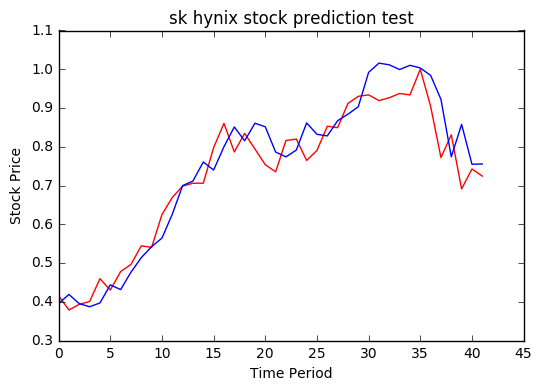

In [46]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                sk_hynix_X: sk_hynix_trainX, sk_hynix_Y: sk_hynix_trainY})
        
        if (i<5):
            print("[step: {}] loss: {}".format(i, step_loss))
            
        elif(i>iterations-5):
            print("[step: {}] loss: {}".format(i, step_loss))
       
            

    # Test step
    test_predict = sess.run(sk_hynix_Y_pred, feed_dict={sk_hynix_X: sk_hynix_testX})
    
    rmse_val = sess.run(rmse, feed_dict={
                    targets: sk_hynix_testY, predictions: test_predict})
    
    print("RMSE: {}".format(rmse_val))
    
    # Plot predictions
    
    plt.title('sk hynix stock prediction test')
    plt.plot(sk_hynix_testY, color='red', label='actual')
    plt.plot(test_predict, color='blue', label='prediction')
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()

In [40]:
print('red : actual')
print('blue:prediction')

red : actual
blue:prediction


In [47]:
sk_hynix_testY

array([[ 0.41544118],
       [ 0.37867647],
       [ 0.39338235],
       [ 0.40073529],
       [ 0.45955882],
       [ 0.43014706],
       [ 0.47794118],
       [ 0.49632353],
       [ 0.54411765],
       [ 0.54044118],
       [ 0.625     ],
       [ 0.66911765],
       [ 0.69852941],
       [ 0.70588235],
       [ 0.70588235],
       [ 0.79779412],
       [ 0.86029412],
       [ 0.78676471],
       [ 0.83455882],
       [ 0.79411765],
       [ 0.75367647],
       [ 0.73529412],
       [ 0.81617647],
       [ 0.81985294],
       [ 0.76470588],
       [ 0.79044118],
       [ 0.85294118],
       [ 0.84926471],
       [ 0.91176471],
       [ 0.93014706],
       [ 0.93382353],
       [ 0.91911765],
       [ 0.92647059],
       [ 0.9375    ],
       [ 0.93382353],
       [ 1.        ],
       [ 0.90441176],
       [ 0.77205882],
       [ 0.83088235],
       [ 0.69117647],
       [ 0.74264706],
       [ 0.72426471]])

In [48]:
test_predict

array([[ 0.39559591],
       [ 0.41883081],
       [ 0.39494386],
       [ 0.38709685],
       [ 0.39696458],
       [ 0.44359401],
       [ 0.43139607],
       [ 0.47628334],
       [ 0.51383752],
       [ 0.54233813],
       [ 0.56423217],
       [ 0.62588948],
       [ 0.69976461],
       [ 0.71152794],
       [ 0.76069927],
       [ 0.73986298],
       [ 0.80005902],
       [ 0.8510831 ],
       [ 0.81535703],
       [ 0.86072153],
       [ 0.85146993],
       [ 0.78637862],
       [ 0.77385235],
       [ 0.7914378 ],
       [ 0.86146683],
       [ 0.83210778],
       [ 0.82795811],
       [ 0.86725324],
       [ 0.88406813],
       [ 0.90327328],
       [ 0.99206287],
       [ 1.01580977],
       [ 1.01141214],
       [ 0.99925268],
       [ 1.01014924],
       [ 1.00335145],
       [ 0.98407251],
       [ 0.92223948],
       [ 0.77410448],
       [ 0.85776198],
       [ 0.75477237],
       [ 0.75567883]], dtype=float32)